The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [66]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the Nobel Prize dataset
nobel_df = pd.read_csv('data/nobel.csv')

# Take a look at the first few rows
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [67]:
# Most commonly awarded gender and birth country
top_gender = nobel_df['sex'].mode()[0]
print("Most commonly awarded gender:",top_gender)
top_country = nobel_df['birth_country'].mode()[0]
print("Most commonly awarded birth country:",top_country)

Most commonly awarded gender: Male
Most commonly awarded birth country: United States of America


The decade with the highest US-born Nobel Prize winners ratio is: 2000


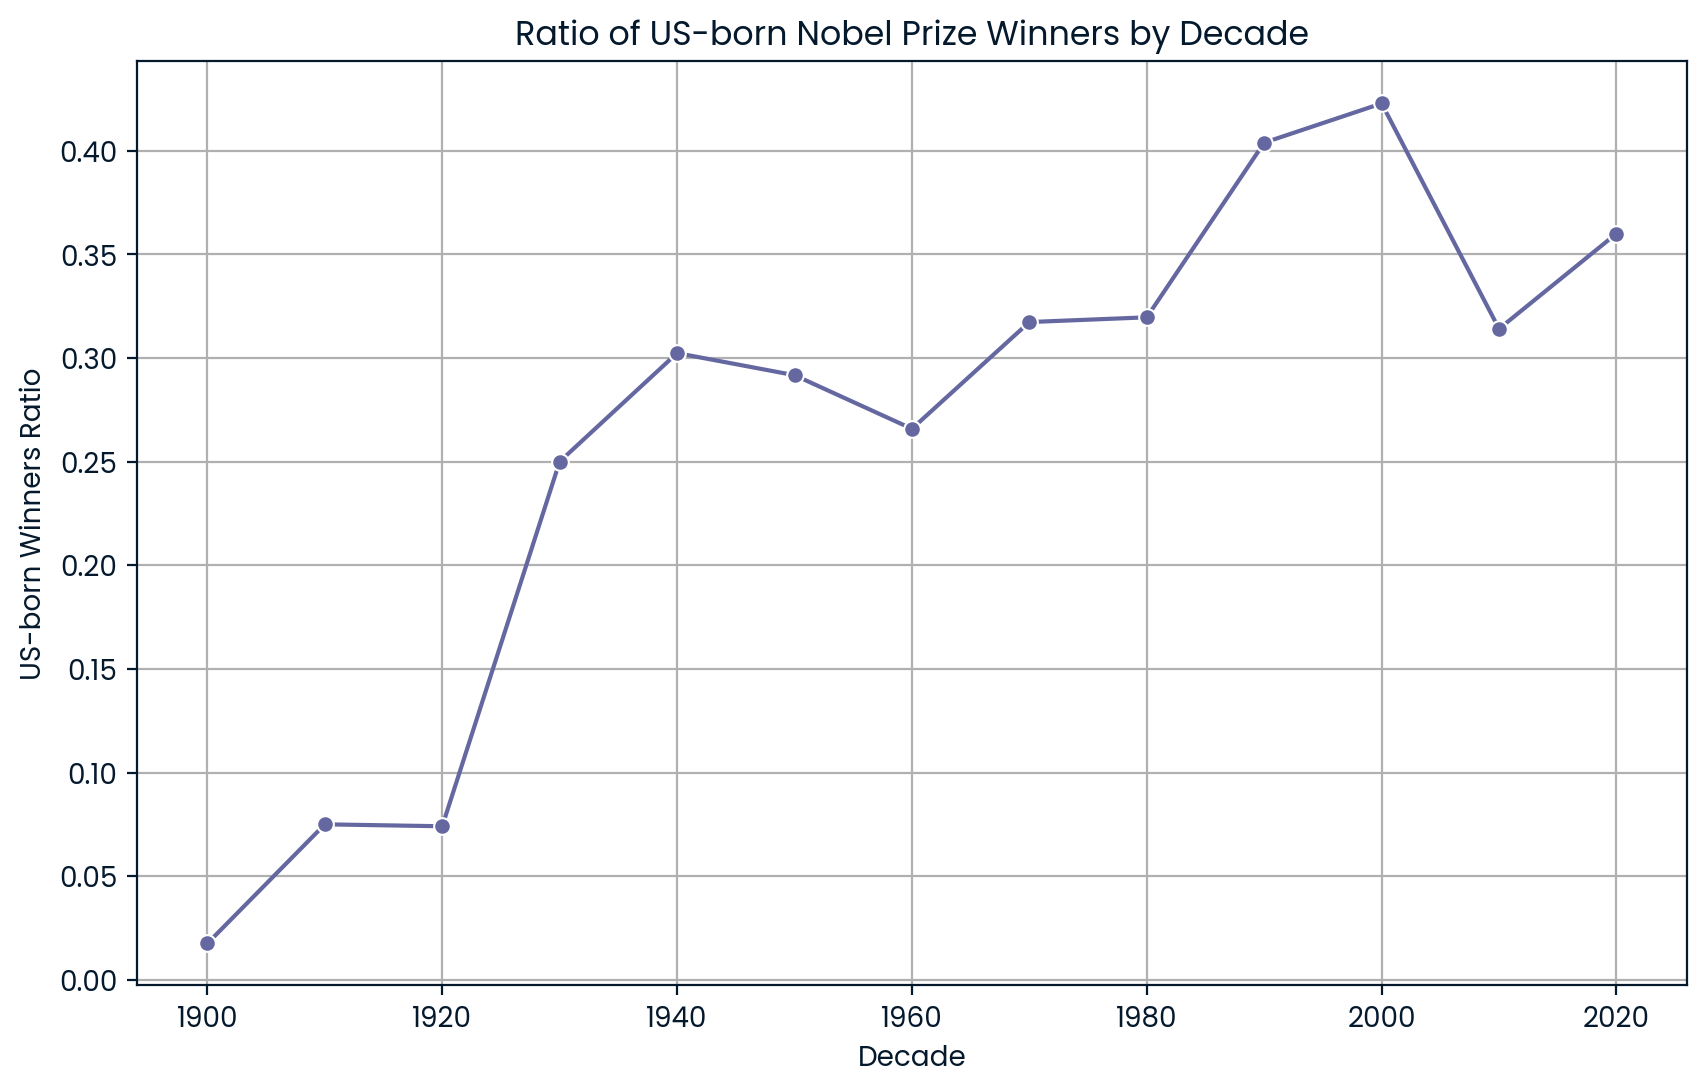

In [68]:
# Add a 'decade' column
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

# Count total winners and US-born winners per decade
total_per_decade = nobel_df.groupby('decade').size()
us_winners_per_decade = nobel_df[nobel_df['birth_country'] == 'United States of America'].groupby('decade').size()

# Calculate the ratio
ratios = (us_winners_per_decade / total_per_decade).fillna(0)

# Find the decade with the highest ratio
max_decade_usa = ratios.idxmax()

# Print the decade with the highest ratio
print(f"The decade with the highest US-born Nobel Prize winners ratio is: {max_decade_usa}")

# Reset the index to make 'decade' a column for easier plotting
us_winners_ratio_df = ratios.reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='decade', y=0, data=us_winners_ratio_df, marker='o')

# Add title and labels
plt.title('Ratio of US-born Nobel Prize Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('US-born Winners Ratio')
plt.grid(True)
plt.show()

Highest proportion of female laureates: Decade 2020 in the category Literature


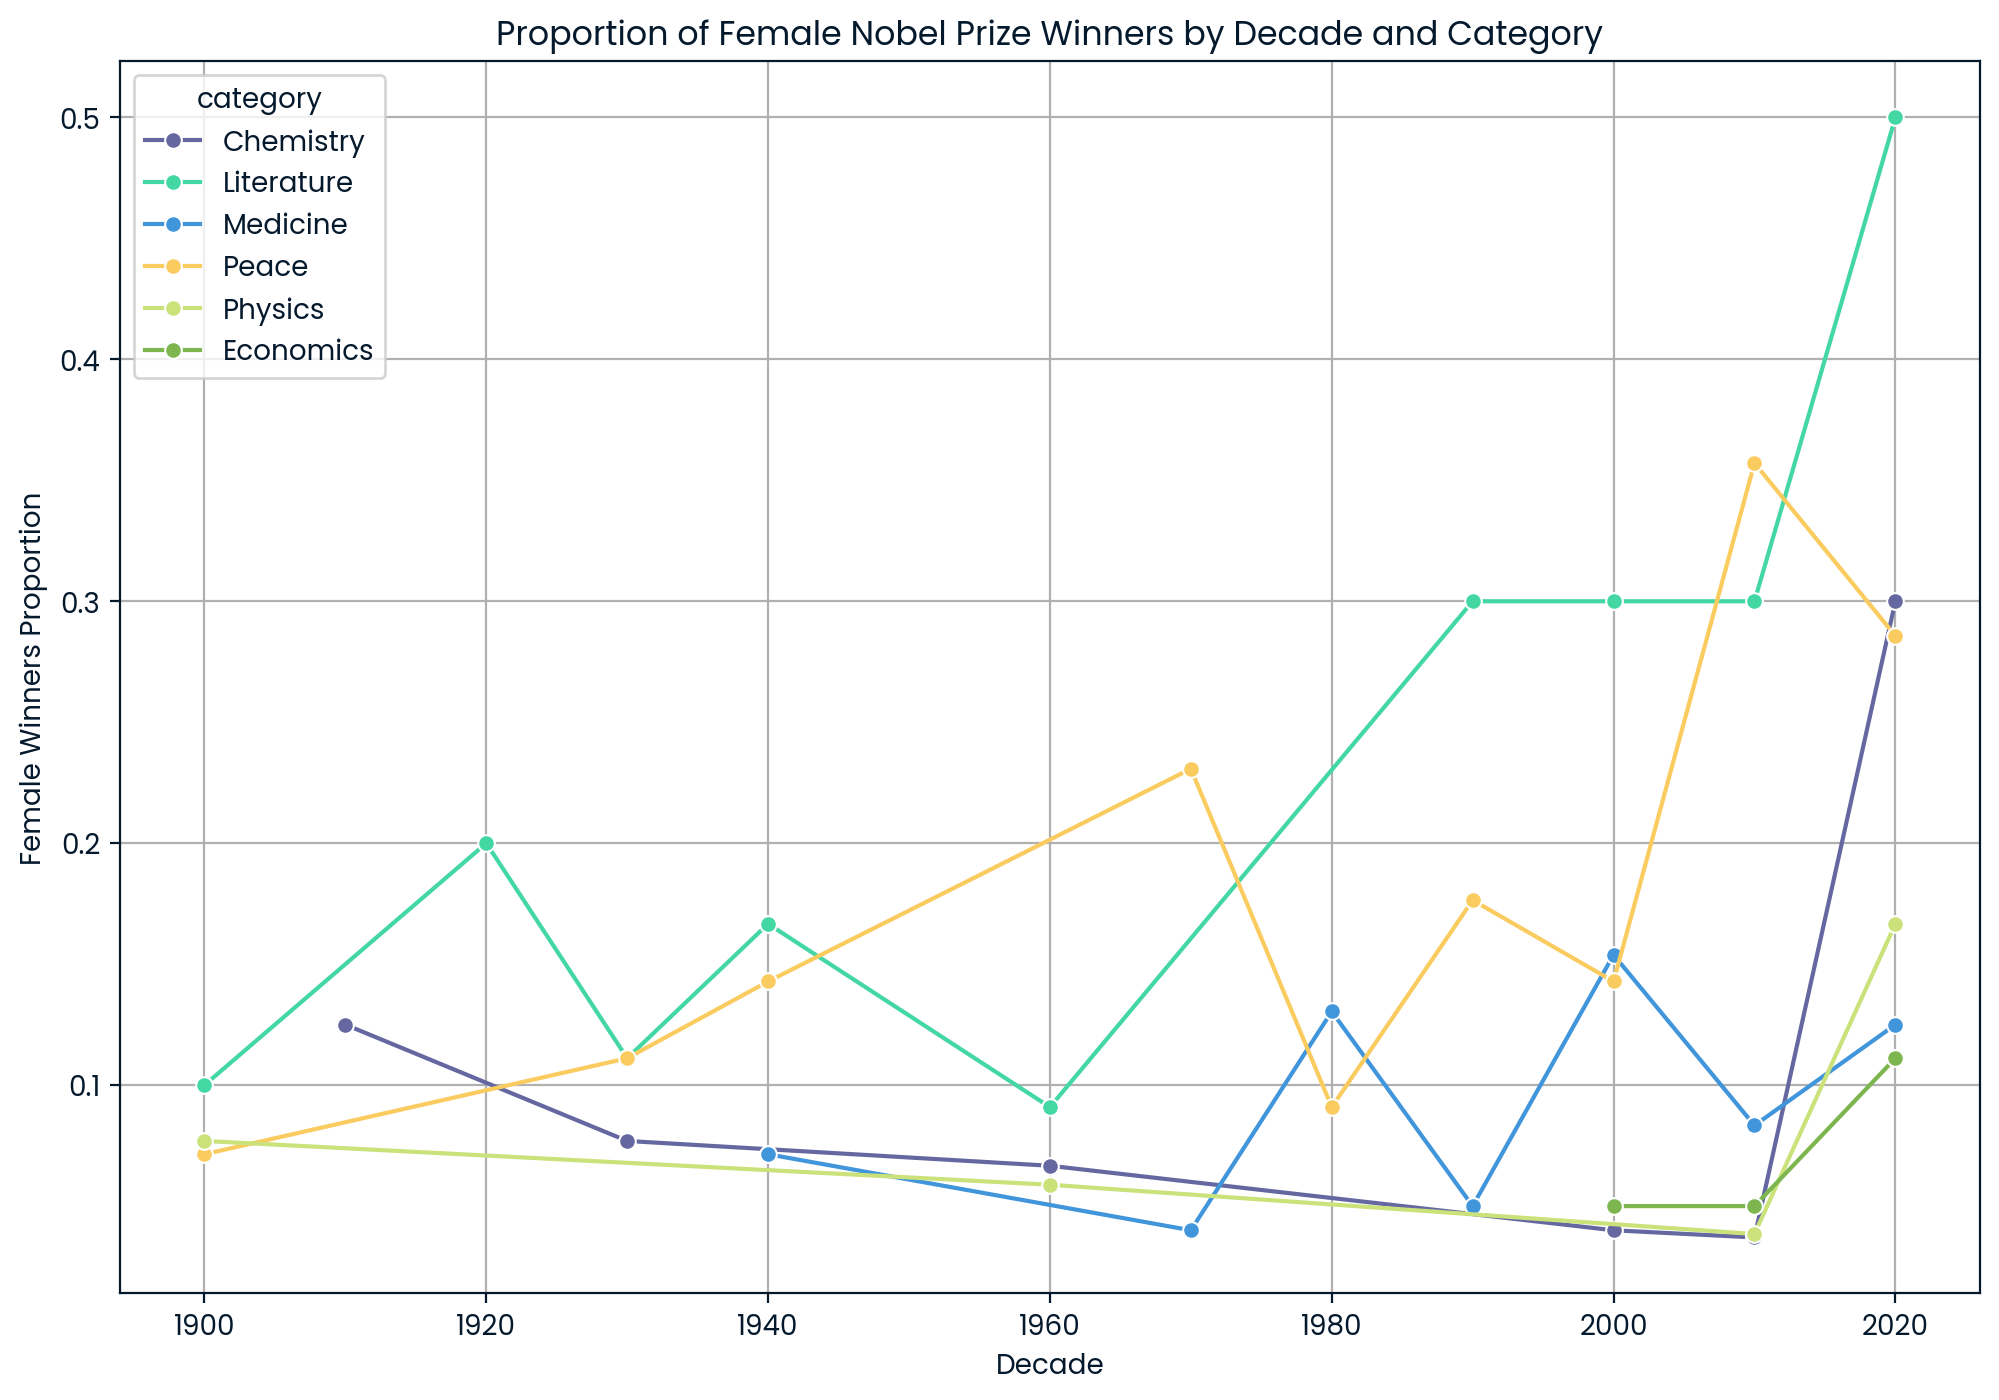

In [69]:
# Filter female laureates
female_df = nobel_df[nobel_df['sex'] == 'Female']

# Group by decade and category to calculate the proportion of female laureates
female_proportion = female_df.groupby(['decade', 'category']).size() / nobel_df.groupby(['decade', 'category']).size()

# Reset index to turn the 'decade' and 'category' columns into data columns
female_proportion = female_proportion.reset_index(name='female_proportion')

# Find the decade and category combination with the highest proportion of female laureates
max_female_combination = female_proportion.loc[female_proportion['female_proportion'].idxmax()]

# Store the result in a dictionary
max_female_dict = {max_female_combination['decade']: max_female_combination['category']}

# Print the result
print(f"Highest proportion of female laureates: Decade {max_female_combination['decade']} in the category {max_female_combination['category']}")

# Create the relational line plot with multiple categories
plt.figure(figsize=(12, 8))
sns.lineplot(x='decade', y='female_proportion', hue='category', data=female_proportion, marker='o')

# Add title and labels
plt.title('Proportion of Female Nobel Prize Winners by Decade and Category')
plt.xlabel('Decade')
plt.ylabel('Female Winners Proportion')
plt.grid(True)

# Show the plot
plt.show()

In [70]:
# Find the first female laureate
first_woman = female_df.sort_values(by='year').iloc[0]
# Store the name and category
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']
print(f"First woman to win a Nobel Prize: {first_woman_name} in {first_woman_category}")

First woman to win a Nobel Prize: Marie Curie, née Sklodowska in Physics


In [71]:
# Count occurrences of names
repeat_winners = nobel_df['full_name'].value_counts()

# Filter for those who have won more than once
repeat_list = repeat_winners[repeat_winners > 1].index.tolist()
print("Repeat winners:")
repeat_list

Repeat winners:


['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']